## Exercice on Time Series similarity 

0) read the data in a dataframe and ensure that value scaling is applied (e.g., Z_Normalization)

1) Implement the DTW algorithm using the introduced Dynamic Programming procedure.

### Note: You can implement Euclidean distance with your own routine, otherwise you can find it in many different libraries (e,g, scipy.spatial.distance.euclidean) 

2) Implement a simple sequential scan, to find the nearest neighbor (match with the smallest distance) of each series in the dataset. Use the Euclidean distance.

### Note: In the following exercices it will be mandatory to use the DTW distance implemented in the exercice 1.
### LB_Keogh impl can be found here: tslearn.metrics

3)  Implement a simple sequential scan, to find the nearest neighbor (match with the smallest distance) of each series in the dataset. Use Dynamic Warping.

4) Implement a smart sequential scan (using (LB) lower-bounding measure to prune the search space)  to find the nearest neighbor (match with the smallest distance) of each series in the dataset. Use Dynamic Warping and the relative LB.

5) Record and compare computation time of the different solutions

In [36]:
import numpy as np
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import os 

import dtaidistance
import math
from dtaidistance import dtw

from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance


from timeit import default_timer as timer
from tslearn import metrics

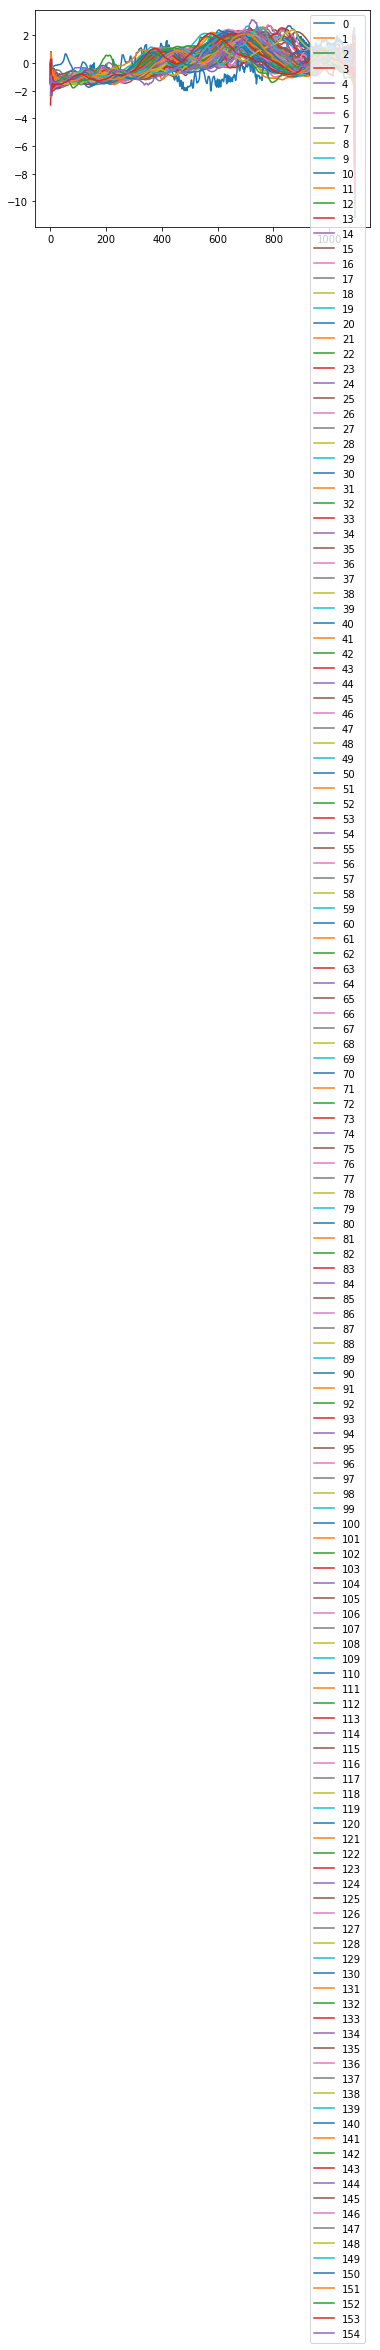

In [38]:
# read Haptics motion time series (UCR Time Series Classification Archive) 

HapticsTS = pd.read_csv(os.path.join("data","Haptics","Haptics_TRAIN.tsv"),sep="\t", header=None)
HapticsTS = HapticsTS.drop(0, axis = 1)
HapticsTS.transpose().plot()

In [39]:
HapticsTS.head()

,1,2,3,4,5,6,7,8,9,10,...,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092
0,-1.047477,0.548336,-0.259562,-1.581216,-1.915218,-1.278188,-0.691525,-0.785471,-1.254217,-1.485490,...,-0.062936,0.280924,-0.071737,-0.872673,-1.031787,0.058567,1.399485,0.896761,-2.691291,-8.196283
1,-1.018153,0.514133,-0.097370,-1.374493,-1.957364,-1.567188,-0.906353,-0.719380,-1.059379,-1.459547,...,0.375688,0.308811,-0.353281,-0.939404,-0.583731,0.698780,1.645471,0.557882,-3.187261,-8.316916
2,-1.183382,0.339636,0.045998,-1.080209,-1.934357,-1.972025,-1.412721,-0.877084,-0.792141,-1.108538,...,-0.169072,-0.775355,-1.318858,-1.159807,-0.159063,1.002750,1.113615,-0.791413,-4.643261,-9.216530
3,-0.896969,0.186145,0.578290,0.392361,-0.157240,-0.818047,-1.374046,-1.678971,-1.689535,-1.459605,...,0.138206,0.877230,1.441031,1.556109,1.005197,-0.308639,-2.323515,-4.812357,-7.448790,-9.872887
4,-1.009424,0.614673,-0.397552,-1.766144,-1.906942,-1.145026,-0.717200,-1.041896,-1.525240,-1.563815,...,-0.546236,-0.024516,-0.031732,-0.793309,-1.317245,-0.510563,1.029388,1.012195,-2.366606,-8.128357
